In [660]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline
df=pd.read_csv("housing_prices.csv")

In [665]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [87]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

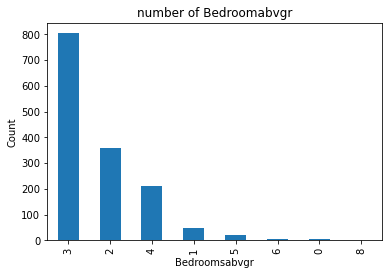

In [88]:
df['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('number of Bedroomabvgr')
plt.xlabel('Bedroomsabvgr')
plt.ylabel('Count')
sns.despine

In [89]:
a=df.dtypes

In [90]:
for i in range(len(a)):
    print(a[i],df.columns[i])

int64 Id
int64 MSSubClass
object MSZoning
float64 LotFrontage
int64 LotArea
object Street
object Alley
object LotShape
object LandContour
object Utilities
object LotConfig
object LandSlope
object Neighborhood
object Condition1
object Condition2
object BldgType
object HouseStyle
int64 OverallQual
int64 OverallCond
int64 YearBuilt
int64 YearRemodAdd
object RoofStyle
object RoofMatl
object Exterior1st
object Exterior2nd
object MasVnrType
float64 MasVnrArea
object ExterQual
object ExterCond
object Foundation
object BsmtQual
object BsmtCond
object BsmtExposure
object BsmtFinType1
int64 BsmtFinSF1
object BsmtFinType2
int64 BsmtFinSF2
int64 BsmtUnfSF
int64 TotalBsmtSF
object Heating
object HeatingQC
object CentralAir
object Electrical
int64 1stFlrSF
int64 2ndFlrSF
int64 LowQualFinSF
int64 GrLivArea
int64 BsmtFullBath
int64 BsmtHalfBath
int64 FullBath
int64 HalfBath
int64 BedroomAbvGr
int64 KitchenAbvGr
object KitchenQual
int64 TotRmsAbvGrd
object Functional
int64 Fireplaces
object FireplaceQu

In [91]:
df_int=df.select_dtypes(include='int64')

In [92]:
df_int

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [93]:
df_int.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [94]:
x=df['YearBuilt'].values
x

array([2003, 1976, 2001, ..., 1941, 1950, 1965], dtype=int64)

In [95]:
y=df['SalePrice'].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

<Figure size 720x720 with 0 Axes>

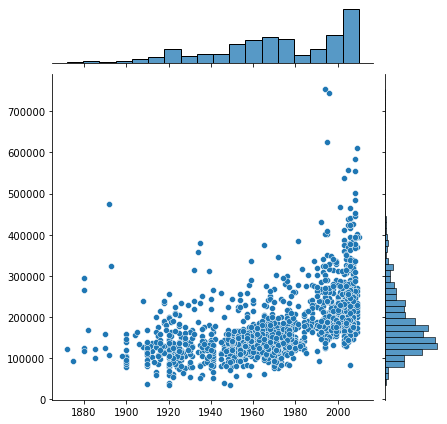

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [96]:
plt.figure(figsize=(10,10))
sns.jointplot(x=x,y=y)
plt.xlabel('year built')
plt.ylabel('sales price')
plt.show()
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

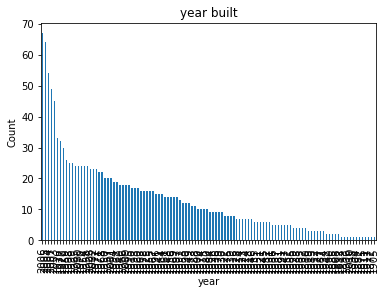

In [97]:
df['YearBuilt'].value_counts().plot(kind='bar')
plt.title('year built')
plt.xlabel('year')
plt.ylabel('Count')
sns.despine

In [102]:
df=df.drop(['Id'],axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [104]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [107]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Text(0, 0.5, 'salesprices')

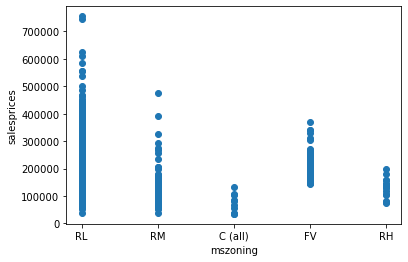

In [112]:
plt.scatter(df['MSZoning'],df['SalePrice'])
plt.xlabel('mszoning')
plt.ylabel('salesprices')

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

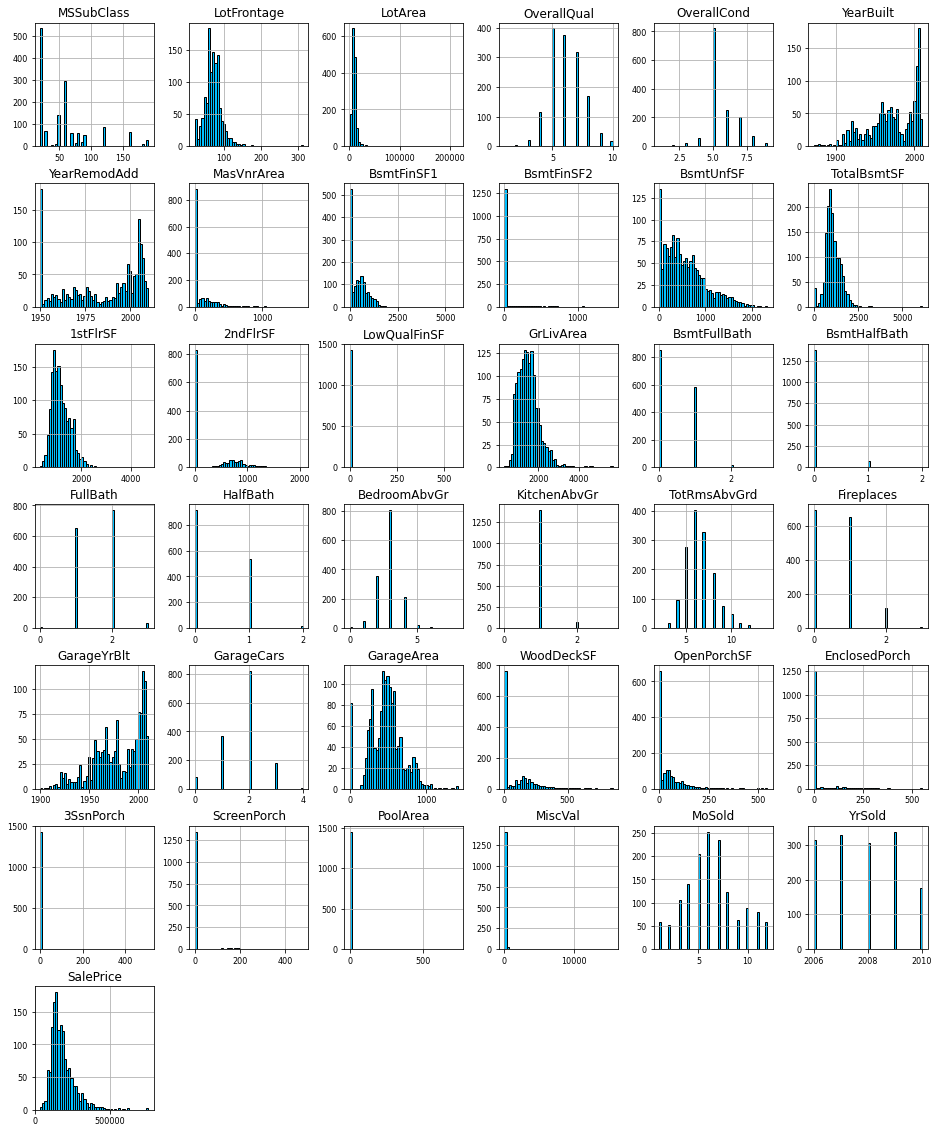

In [114]:
df.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

<AxesSubplot:>

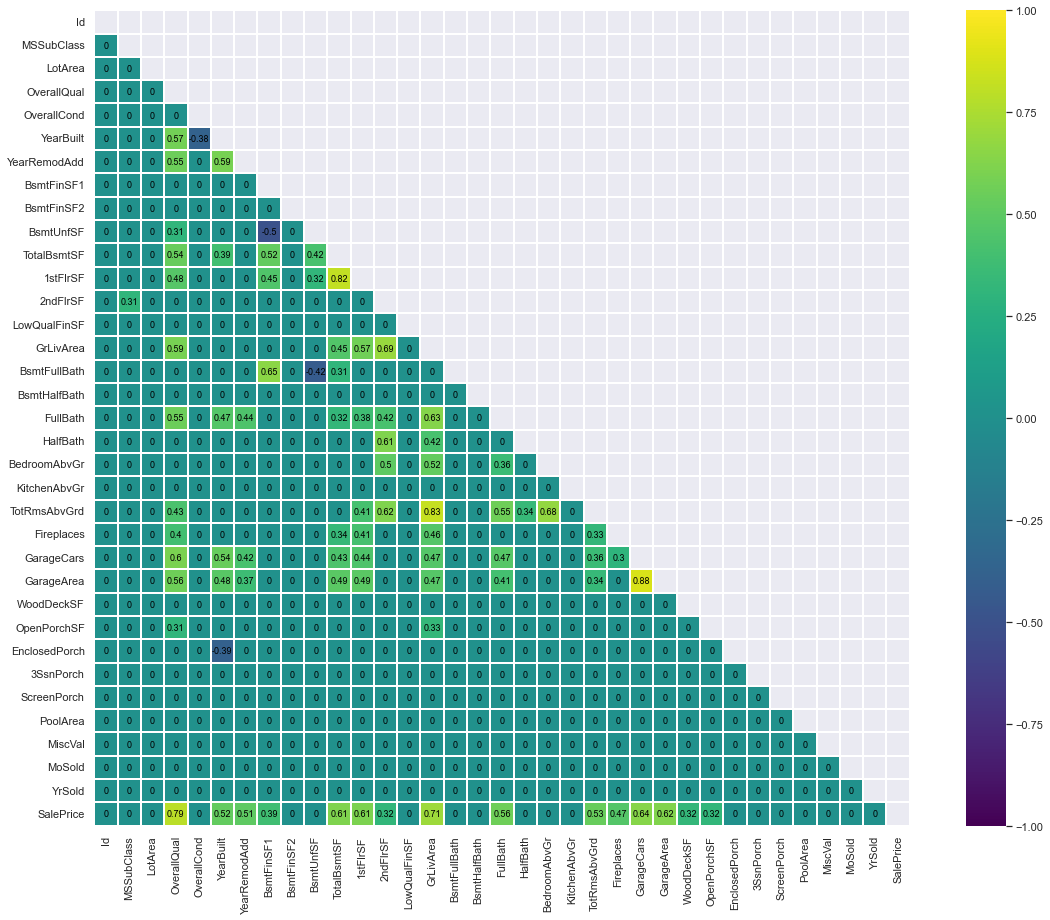

In [126]:
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_int.corr()

# Replace any correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [127]:
data_num_corr = df.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = data_num_corr[abs(data_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64



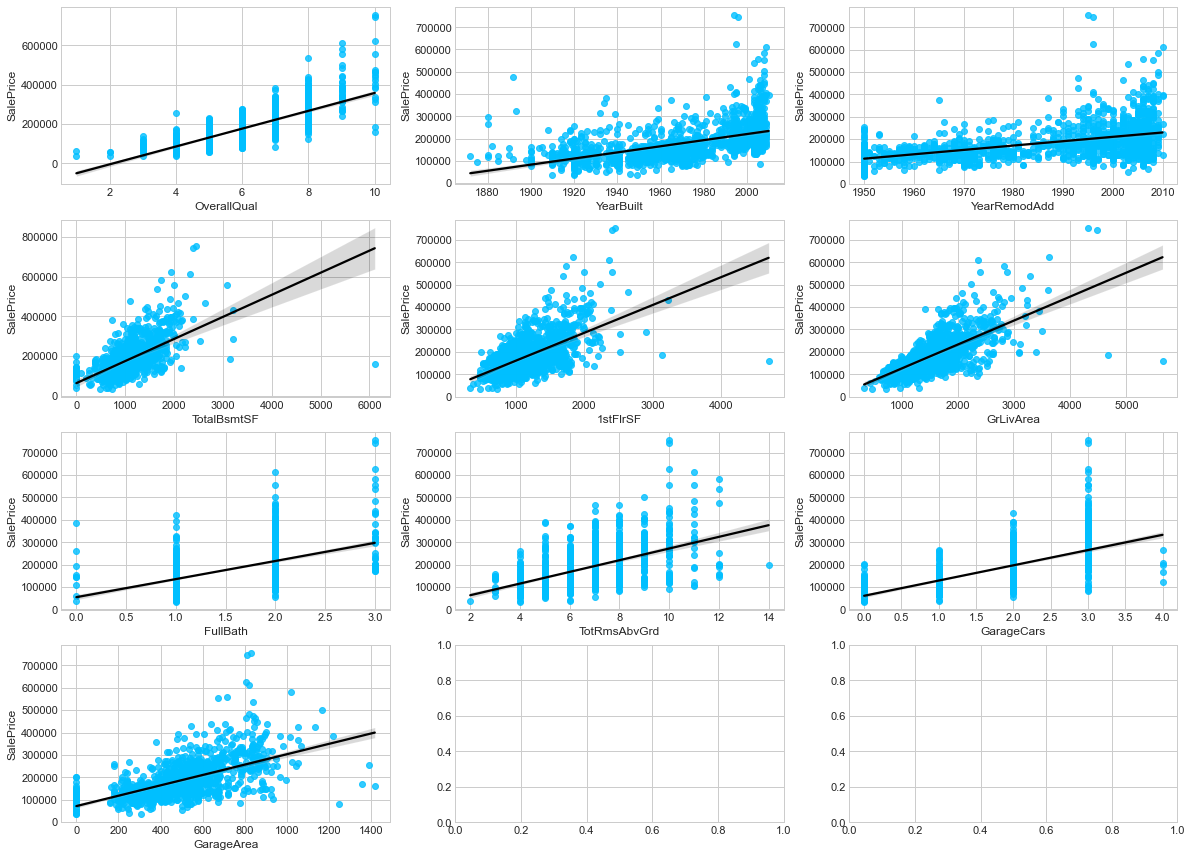

In [129]:
# Features with high correlation (higher than 0.5)
strong_features = data_num_corr[abs(data_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

data_strong_features = df.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=data_strong_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"})

In [181]:
df1=df.select_dtypes(include=[np.number])

In [182]:
cols_with_missing_b = [col for col in df1.columns
                       if df[col].isnull().any()]
cols_with_missing_b

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [183]:
cols_nan_count_b = list(map(lambda col: round(df[col].isna().sum()*100/len(df)), cols_with_missing_b))
cols_nan_count_b

[18, 1, 6]

In [184]:
tab = pd.DataFrame(cols_with_missing_b, columns=["Column"])
tab["Percent_NaN"] = cols_nan_count_b
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)
tab

,Column,Percent_NaN
0,LotFrontage,18
2,GarageYrBlt,6
1,MasVnrArea,1


Text(0, 0.5, 'Column Name\n')

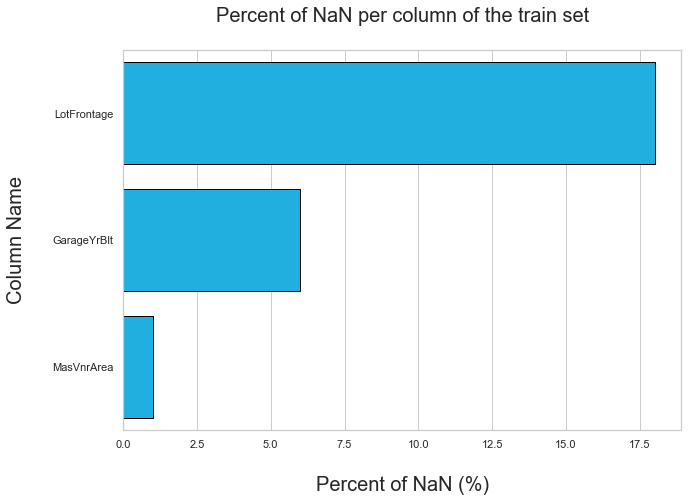

In [185]:
# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [186]:
df1=df.select_dtypes(include=[np.number])

In [187]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy="median")
data_test_imputed = pd.DataFrame(my_imputer.fit_transform(df1))
data_test_imputed.columns = df1.columns

In [188]:
data_test_imputed

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.00,60.00,65.00,"8,450.00",7.00,5.00,"2,003.00","2,003.00",196.00,706.00,...,0.00,61.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,008.00","208,500.00"
1,2.00,20.00,80.00,"9,600.00",6.00,8.00,"1,976.00","1,976.00",0.00,978.00,...,298.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","181,500.00"
2,3.00,60.00,68.00,"11,250.00",7.00,5.00,"2,001.00","2,002.00",162.00,486.00,...,0.00,42.00,0.00,0.00,0.00,0.00,0.00,9.00,"2,008.00","223,500.00"
3,4.00,70.00,60.00,"9,550.00",7.00,5.00,"1,915.00","1,970.00",0.00,216.00,...,0.00,35.00,272.00,0.00,0.00,0.00,0.00,2.00,"2,006.00","140,000.00"
4,5.00,60.00,84.00,"14,260.00",8.00,5.00,"2,000.00","2,000.00",350.00,655.00,...,192.00,84.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,008.00","250,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,"1,456.00",60.00,62.00,"7,917.00",6.00,5.00,"1,999.00","2,000.00",0.00,0.00,...,0.00,40.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,007.00","175,000.00"
1456,"1,457.00",20.00,85.00,"13,175.00",6.00,6.00,"1,978.00","1,988.00",119.00,790.00,...,349.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,010.00","210,000.00"
1457,"1,458.00",70.00,66.00,"9,042.00",7.00,9.00,"1,941.00","2,006.00",0.00,275.00,...,0.00,60.00,0.00,0.00,0.00,0.00,"2,500.00",5.00,"2,010.00","266,500.00"
1458,"1,459.00",20.00,68.00,"9,717.00",5.00,6.00,"1,950.00","1,996.00",0.00,49.00,...,366.00,0.00,112.00,0.00,0.00,0.00,0.00,4.00,"2,010.00","142,125.00"


In [189]:
my_imputer = SimpleImputer(strategy="median")
data_train_imputed = pd.DataFrame(my_imputer.fit_transform(df1))
data_train_imputed.columns = df1.columns
data_train_imputed

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.00,60.00,65.00,"8,450.00",7.00,5.00,"2,003.00","2,003.00",196.00,706.00,...,0.00,61.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,008.00","208,500.00"
1,2.00,20.00,80.00,"9,600.00",6.00,8.00,"1,976.00","1,976.00",0.00,978.00,...,298.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","181,500.00"
2,3.00,60.00,68.00,"11,250.00",7.00,5.00,"2,001.00","2,002.00",162.00,486.00,...,0.00,42.00,0.00,0.00,0.00,0.00,0.00,9.00,"2,008.00","223,500.00"
3,4.00,70.00,60.00,"9,550.00",7.00,5.00,"1,915.00","1,970.00",0.00,216.00,...,0.00,35.00,272.00,0.00,0.00,0.00,0.00,2.00,"2,006.00","140,000.00"
4,5.00,60.00,84.00,"14,260.00",8.00,5.00,"2,000.00","2,000.00",350.00,655.00,...,192.00,84.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,008.00","250,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,"1,456.00",60.00,62.00,"7,917.00",6.00,5.00,"1,999.00","2,000.00",0.00,0.00,...,0.00,40.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,007.00","175,000.00"
1456,"1,457.00",20.00,85.00,"13,175.00",6.00,6.00,"1,978.00","1,988.00",119.00,790.00,...,349.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,010.00","210,000.00"
1457,"1,458.00",70.00,66.00,"9,042.00",7.00,9.00,"1,941.00","2,006.00",0.00,275.00,...,0.00,60.00,0.00,0.00,0.00,0.00,"2,500.00",5.00,"2,010.00","266,500.00"
1458,"1,459.00",20.00,68.00,"9,717.00",5.00,6.00,"1,950.00","1,996.00",0.00,49.00,...,366.00,0.00,112.00,0.00,0.00,0.00,0.00,4.00,"2,010.00","142,125.00"


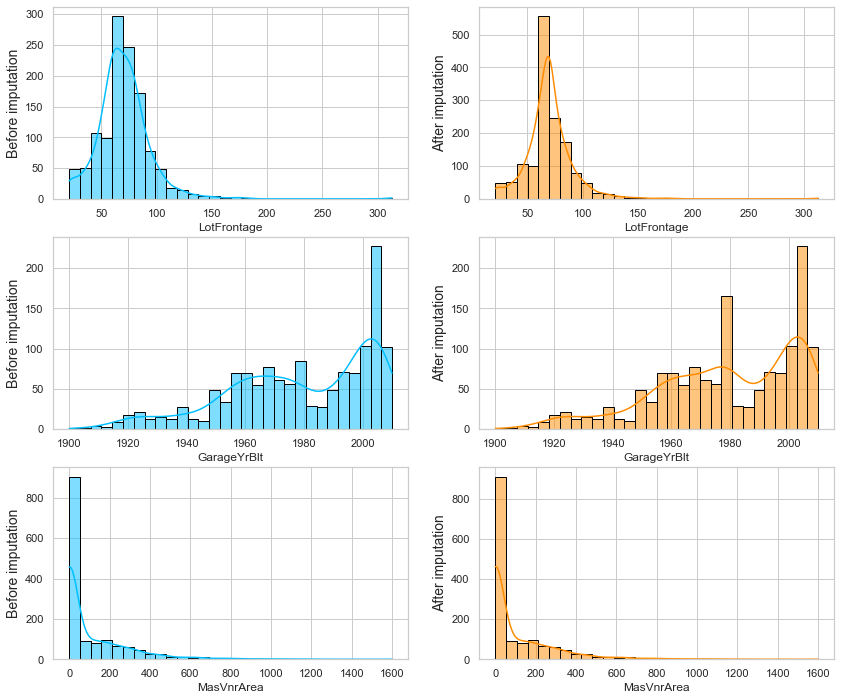

In [190]:
# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df1[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=data_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [191]:
# Drop 'LotFrontage' and 'GarageYrBlt'
data_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
data_train_imputed.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.00,60.00,"8,450.00",7.00,5.00,"2,003.00","2,003.00",196.00,706.00,0.00,...,0.00,61.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,008.00","208,500.00"
1,2.00,20.00,"9,600.00",6.00,8.00,"1,976.00","1,976.00",0.00,978.00,0.00,...,298.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","181,500.00"
2,3.00,60.00,"11,250.00",7.00,5.00,"2,001.00","2,002.00",162.00,486.00,0.00,...,0.00,42.00,0.00,0.00,0.00,0.00,0.00,9.00,"2,008.00","223,500.00"
3,4.00,70.00,"9,550.00",7.00,5.00,"1,915.00","1,970.00",0.00,216.00,0.00,...,0.00,35.00,272.00,0.00,0.00,0.00,0.00,2.00,"2,006.00","140,000.00"
4,5.00,60.00,"14,260.00",8.00,5.00,"2,000.00","2,000.00",350.00,655.00,0.00,...,192.00,84.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,008.00","250,000.00"


In [212]:
# Drop these same features from test set
df1.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

KeyError: "['LotFrontage' 'GarageYrBlt'] not found in axis"

In [214]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
data_test_imputed = pd.DataFrame(my_imputer.fit_transform(df1))
data_test_imputed.columns = df1.columns

In [215]:
data_test_imputed

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.00,60.00,"8,450.00",7.00,5.00,"2,003.00","2,003.00",196.00,706.00,0.00,...,0.00,61.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,008.00","208,500.00"
1,2.00,20.00,"9,600.00",6.00,8.00,"1,976.00","1,976.00",0.00,978.00,0.00,...,298.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","181,500.00"
2,3.00,60.00,"11,250.00",7.00,5.00,"2,001.00","2,002.00",162.00,486.00,0.00,...,0.00,42.00,0.00,0.00,0.00,0.00,0.00,9.00,"2,008.00","223,500.00"
3,4.00,70.00,"9,550.00",7.00,5.00,"1,915.00","1,970.00",0.00,216.00,0.00,...,0.00,35.00,272.00,0.00,0.00,0.00,0.00,2.00,"2,006.00","140,000.00"
4,5.00,60.00,"14,260.00",8.00,5.00,"2,000.00","2,000.00",350.00,655.00,0.00,...,192.00,84.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,008.00","250,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,"1,456.00",60.00,"7,917.00",6.00,5.00,"1,999.00","2,000.00",0.00,0.00,0.00,...,0.00,40.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,007.00","175,000.00"
1456,"1,457.00",20.00,"13,175.00",6.00,6.00,"1,978.00","1,988.00",119.00,790.00,163.00,...,349.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"2,010.00","210,000.00"
1457,"1,458.00",70.00,"9,042.00",7.00,9.00,"1,941.00","2,006.00",0.00,275.00,0.00,...,0.00,60.00,0.00,0.00,0.00,0.00,"2,500.00",5.00,"2,010.00","266,500.00"
1458,"1,459.00",20.00,"9,717.00",5.00,6.00,"1,950.00","1,996.00",0.00,49.00,"1,029.00",...,366.00,0.00,112.00,0.00,0.00,0.00,0.00,4.00,"2,010.00","142,125.00"


In [216]:
categorical_features = [
    i for i in df.columns if df.dtypes[i] == "object"]

In [217]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [218]:
categorical_features.append("SalePrice")
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [221]:
# Train set
data_train_categ = df[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
data_test_categ = df[categorical_features[:-1]]

C:\Users\numam\AppData\Local\Temp/ipykernel_9776/1546508849.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/1546508849.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/1546508849.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/1546508849.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/1546508849.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.g

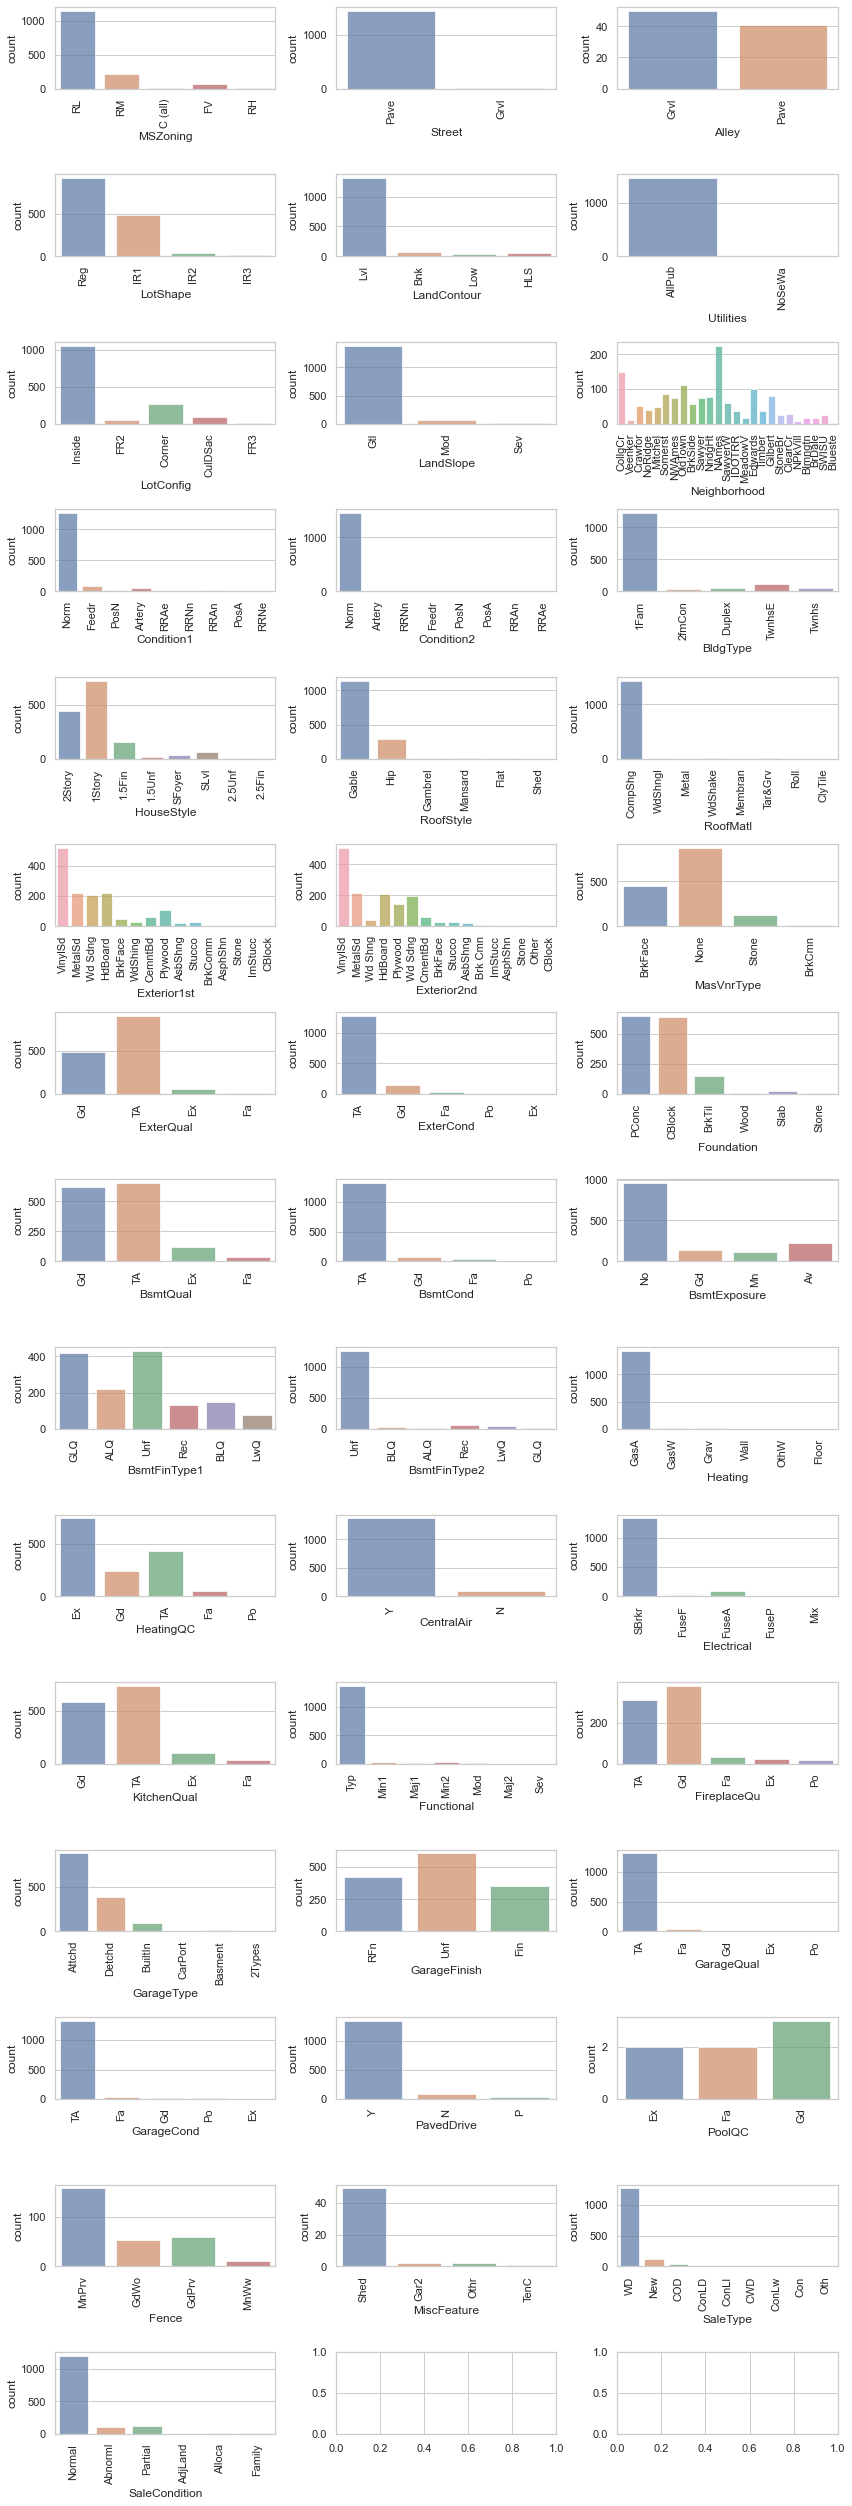

In [222]:
fig, axes = plt.subplots(round(len(data_train_categ.columns) / 3), 3, figsize=(12, 35))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(data_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=data_train_categ.columns[i], alpha=0.7, data=data_train_categ, ax=ax)

fig.tight_layout()

In [572]:
a=data_train_categ.iloc[:,0:1].value_counts()
data_train_categ.iloc[:,0:1].value_counts()

MSZoning
RL          1151
RM           218
FV            65
RH            16
C (all)       10
dtype: int64

In [573]:
def maxDiff(a):
    l = len(a)
    b=a
    diffList = []
    max1 = max(a)
    for i in range(l-1):
        newList = a[i+1:]
        difference = abs(max1 - a[i])
        diffList.append(difference)
    diffList.remove(0)
    if len(diffList)==0:
        return 0
    return (min(diffList))

In [574]:
a=a.tolist()
len(a)

5

In [575]:
b=maxDiff(a)
b

933

In [576]:
max(a)/2 

575.5

In [577]:
lys=data_train_categ
lys

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [600]:
lys.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [601]:
lys=data_train_categ
cols_to_drop=[]
for i in range(data_train_categ.shape[1]):
    a=lys.iloc[:,i].value_counts()
    a=a.tolist()
    b=maxDiff(a)
    if str(b).isdigit:
        if int(max(a)/1.1) < b:
            cols_to_drop.append(lys.columns[i])
    print(b)

933
0
0
441
1248
0
789
1317
75
1179
1439
1106
281
855
1423
293
290
419
418
1136
13
31
1246
732
12
1202
1410
313
0
1240
149
1326
67
483
183
1263
1291
1250
1
98
47
1145
1073
3


In [602]:
cols_to_drop

['LandContour',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature']

In [603]:
len(cols_to_drop)

14

In [604]:
# Training set
data_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
data_test_categ.drop(cols_to_drop, axis=1, inplace=True)

C:\Users\numam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [607]:
data_test_categ

,MSZoning,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,AllPub,Inside,CollgCr,1Fam,2Story,Gable,...,Ex,Y,Gd,NaN,Attchd,RFn,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,AllPub,FR2,Veenker,1Fam,1Story,Gable,...,Ex,Y,TA,TA,Attchd,RFn,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,AllPub,Inside,CollgCr,1Fam,2Story,Gable,...,Ex,Y,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,AllPub,Corner,Crawfor,1Fam,2Story,Gable,...,Gd,Y,Gd,Gd,Detchd,Unf,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,AllPub,FR2,NoRidge,1Fam,2Story,Gable,...,Ex,Y,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,AllPub,Inside,Gilbert,1Fam,2Story,Gable,...,Ex,Y,TA,TA,Attchd,RFn,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,AllPub,Inside,NWAmes,1Fam,1Story,Gable,...,TA,Y,TA,TA,Attchd,Unf,NaN,MnPrv,WD,Normal
1457,RL,Pave,NaN,Reg,AllPub,Inside,Crawfor,1Fam,2Story,Gable,...,Ex,Y,Gd,Gd,Attchd,RFn,NaN,GdPrv,WD,Normal
1458,RL,Pave,NaN,Reg,AllPub,Inside,NAmes,1Fam,1Story,Hip,...,Gd,Y,Gd,NaN,Attchd,Unf,NaN,NaN,WD,Normal


C:\Users\numam\AppData\Local\Temp/ipykernel_9776/394027609.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/394027609.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/394027609.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/394027609.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
C:\Users\numam\AppData\Local\Temp/ipykernel_9776/394027609.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_ma

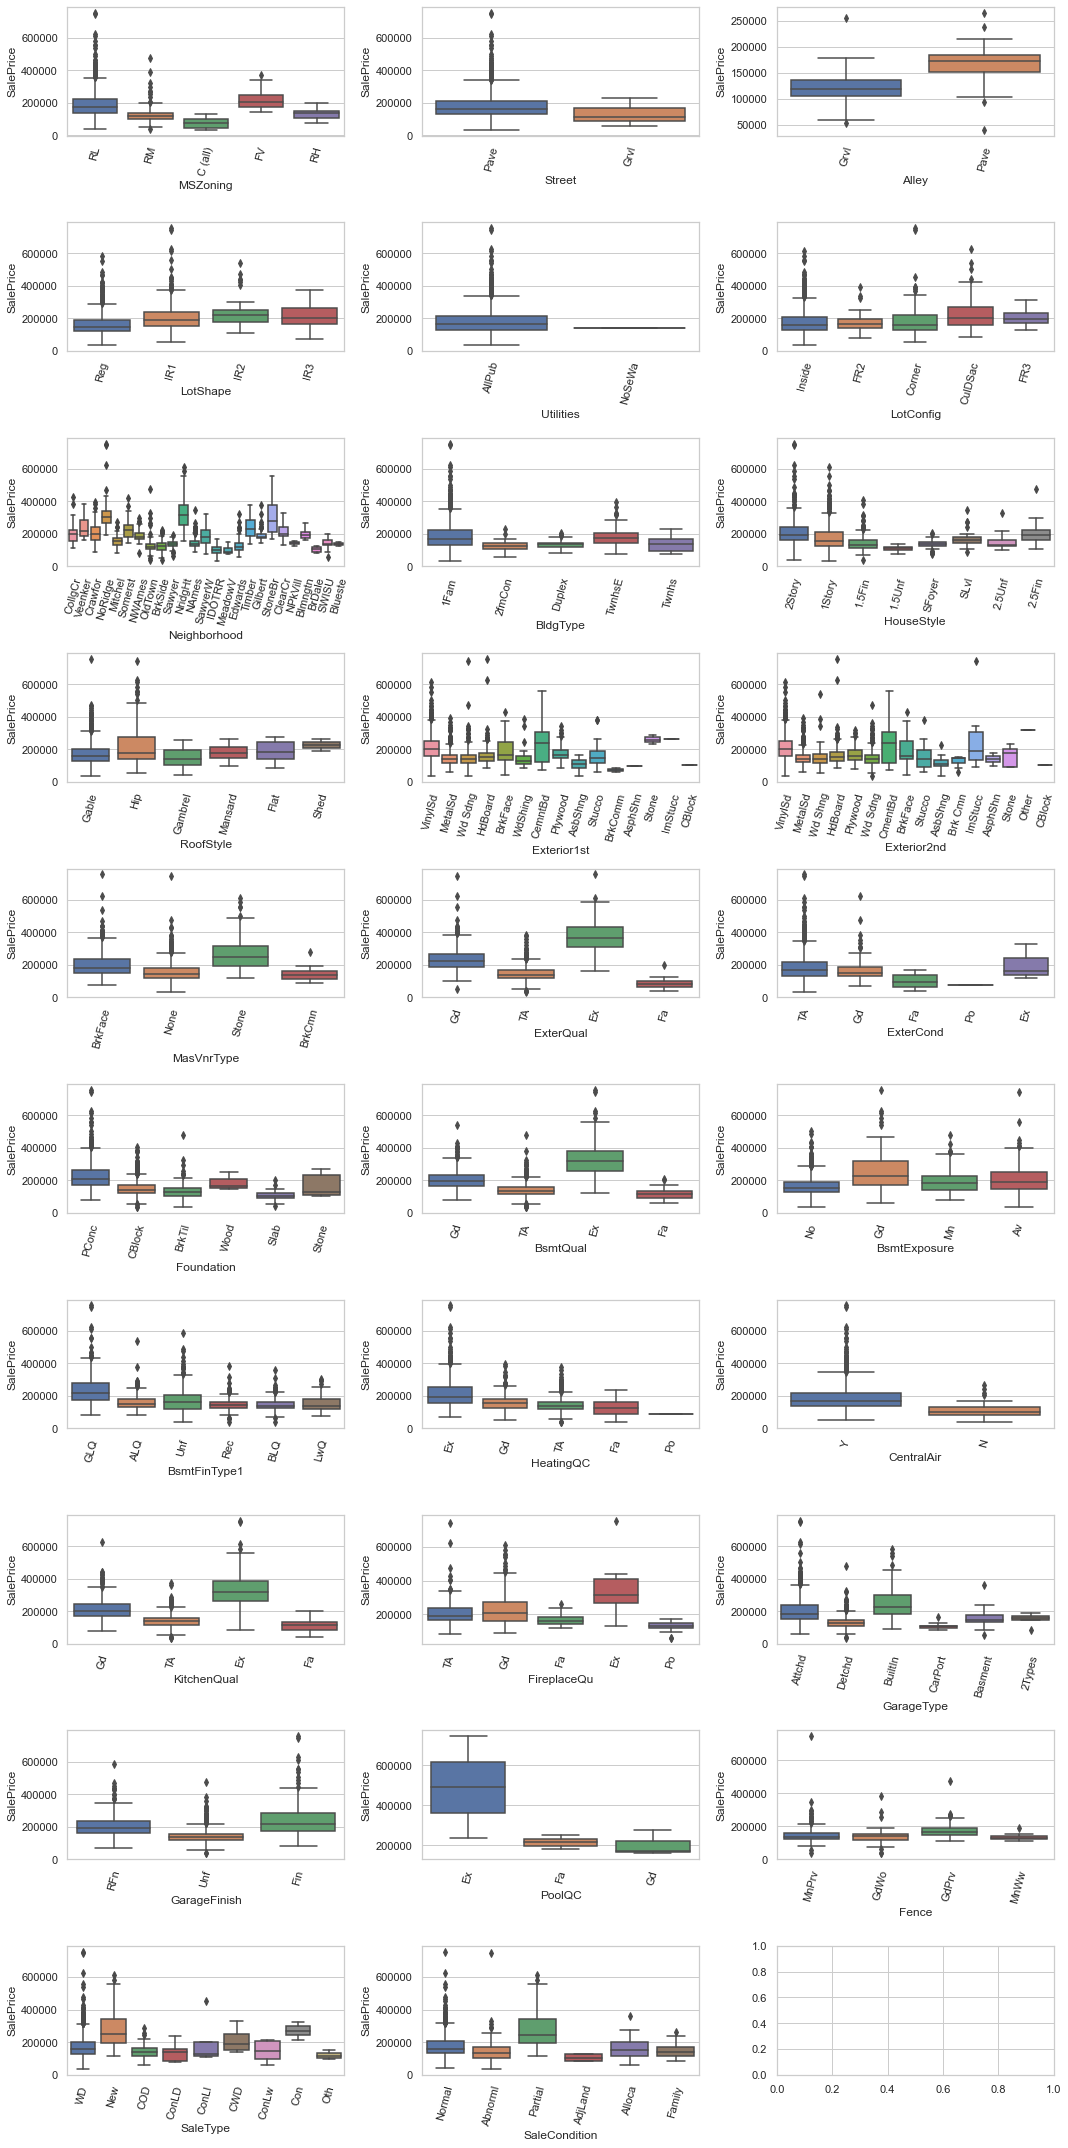

In [608]:
fig, axes = plt.subplots(
    round(len(data_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(data_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(
            x=data_train_categ.columns[i], y="SalePrice", data=data_train_categ, ax=ax)

fig.tight_layout()

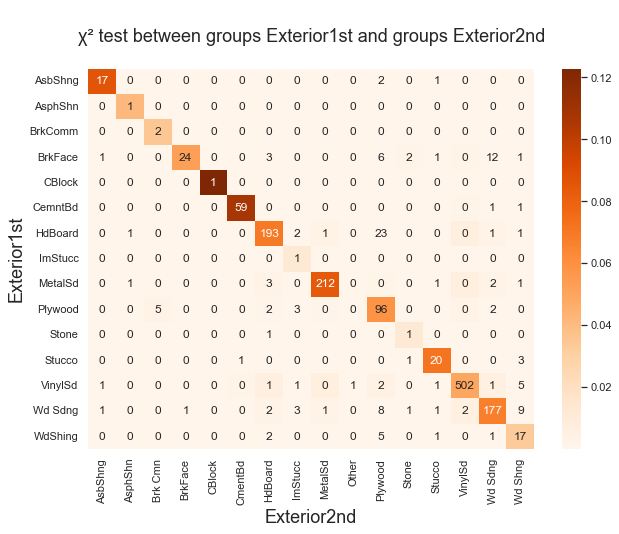

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0

significance=0.050, p=0.000
Dependent (reject H0)


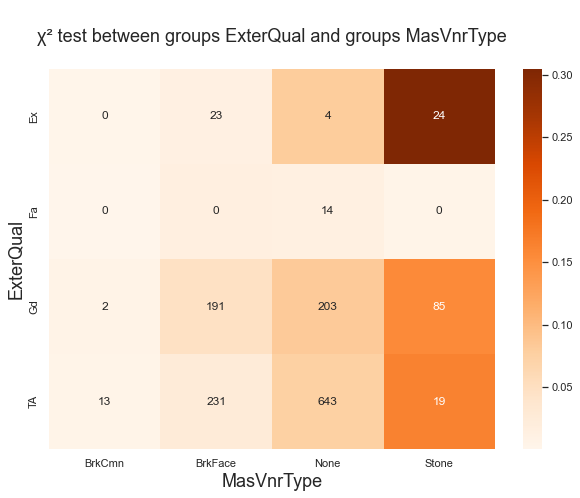

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54

significance=0.050, p=0.000
Dependent (reject H0)


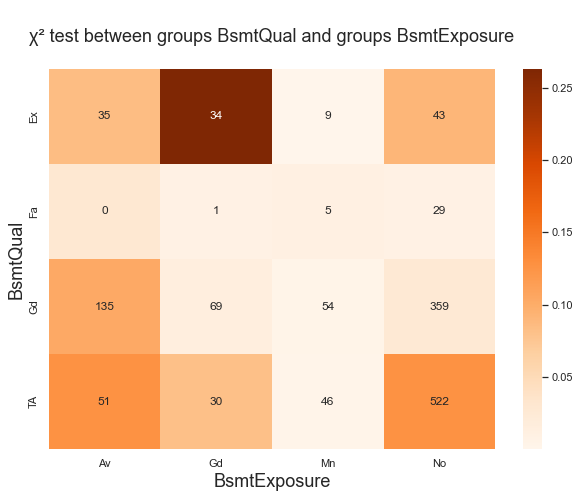

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32

significance=0.050, p=0.000
Dependent (reject H0)


In [610]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

# Parameters for Chi-squared test (5% significance level)
prob = 0.95
alpha = 1.0 - prob

for i, j in zip(X, Y):

    # Contingency table
    cont = data_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(data_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=data_train_categ[i], columns=data_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")
    print('significance=%.3f, p=%.3f' % (alpha, ChiSqResult[1]))
    if ChiSqResult[1] <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [612]:
data_train_categ.drop(Y, axis=1, inplace=True)

# Test set
data_test_categ.drop(Y, axis=1, inplace=True)

C:\Users\numam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [613]:
data_train_categ

,MSZoning,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,...,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,AllPub,Inside,CollgCr,1Fam,2Story,Gable,...,Y,Gd,NaN,Attchd,RFn,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,AllPub,FR2,Veenker,1Fam,1Story,Gable,...,Y,TA,TA,Attchd,RFn,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,AllPub,Inside,CollgCr,1Fam,2Story,Gable,...,Y,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,AllPub,Corner,Crawfor,1Fam,2Story,Gable,...,Y,Gd,Gd,Detchd,Unf,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,AllPub,FR2,NoRidge,1Fam,2Story,Gable,...,Y,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,AllPub,Inside,Gilbert,1Fam,2Story,Gable,...,Y,TA,TA,Attchd,RFn,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,AllPub,Inside,NWAmes,1Fam,1Story,Gable,...,Y,TA,TA,Attchd,Unf,NaN,MnPrv,WD,Normal,210000
1457,RL,Pave,NaN,Reg,AllPub,Inside,Crawfor,1Fam,2Story,Gable,...,Y,Gd,Gd,Attchd,RFn,NaN,GdPrv,WD,Normal,266500
1458,RL,Pave,NaN,Reg,AllPub,Inside,NAmes,1Fam,1Story,Hip,...,Y,Gd,NaN,Attchd,Unf,NaN,NaN,WD,Normal,142125


Categorical Columns with missing (NA) values:
['Alley', 'BsmtQual', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence']


Text(0, 0.5, 'Column Name\n')

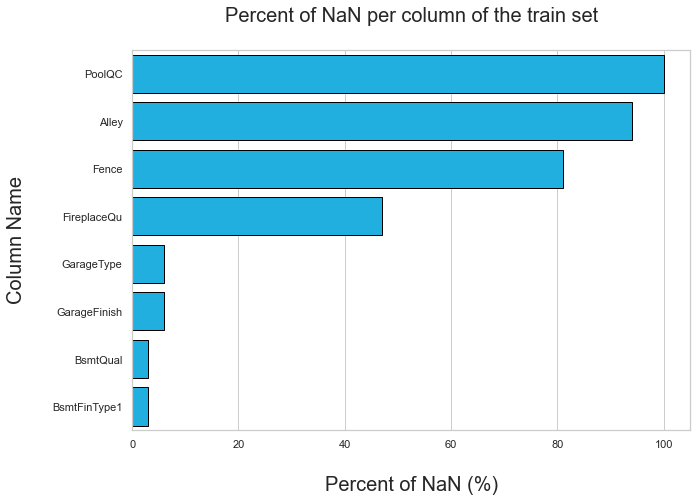

In [614]:
cat_cols_with_missing = [col for col in data_train_categ.columns
                         if data_train_categ[col].isnull().any()]

print("Categorical Columns with missing (NA) values:")
print(cat_cols_with_missing)

# Count how many NA values are in each of those columns
cat_cols_nan_count = list(map(lambda col: round(data_train_categ[col].isna().sum()*100/len(data_train_categ)), 
                              cat_cols_with_missing))


tab_cat = pd.DataFrame(cat_cols_with_missing, columns=["Column"])
tab_cat["Percent_NaN"] = cat_cols_nan_count
tab_cat.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab_cat,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [619]:
tab_cat

,Column,Percent_NaN
6,PoolQC,100
0,Alley,94
7,Fence,81
3,FireplaceQu,47
4,GarageType,6
5,GarageFinish,6
1,BsmtQual,3
2,BsmtFinType1,3


In [620]:
large_na = [col for col in cat_cols_with_missing if (data_train_categ[col].isna().sum()/data_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

data_train_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence']


C:\Users\numam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [621]:
categ_fill_null = {"GarageType": data_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": data_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": data_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": data_train_categ["BsmtFinType1"].mode().iloc[0]}

data_train_categ = data_train_categ.fillna(value=categ_fill_null)

In [623]:
categ_fill_null

{'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'BsmtQual': 'TA',
 'BsmtFinType1': 'Unf'}

In [624]:
data_train_categ

,MSZoning,Street,LotShape,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,...,BsmtQual,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,AllPub,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,...,Gd,GLQ,Ex,Y,Gd,Attchd,RFn,WD,Normal,208500
1,RL,Pave,Reg,AllPub,FR2,Veenker,1Fam,1Story,Gable,MetalSd,...,Gd,ALQ,Ex,Y,TA,Attchd,RFn,WD,Normal,181500
2,RL,Pave,IR1,AllPub,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,...,Gd,GLQ,Ex,Y,Gd,Attchd,RFn,WD,Normal,223500
3,RL,Pave,IR1,AllPub,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,...,TA,ALQ,Gd,Y,Gd,Detchd,Unf,WD,Abnorml,140000
4,RL,Pave,IR1,AllPub,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,...,Gd,GLQ,Ex,Y,Gd,Attchd,RFn,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,AllPub,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,...,Gd,Unf,Ex,Y,TA,Attchd,RFn,WD,Normal,175000
1456,RL,Pave,Reg,AllPub,Inside,NWAmes,1Fam,1Story,Gable,Plywood,...,Gd,ALQ,TA,Y,TA,Attchd,Unf,WD,Normal,210000
1457,RL,Pave,Reg,AllPub,Inside,Crawfor,1Fam,2Story,Gable,CemntBd,...,TA,GLQ,Ex,Y,Gd,Attchd,RFn,WD,Normal,266500
1458,RL,Pave,Reg,AllPub,Inside,NAmes,1Fam,1Story,Hip,MetalSd,...,TA,GLQ,Gd,Y,Gd,Attchd,Unf,WD,Normal,142125


Categorical Columns with missing (NA) values:
['BsmtQual', 'BsmtFinType1', 'GarageType', 'GarageFinish']


C:\Users\numam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0, 0.5, 'Column Name\n')

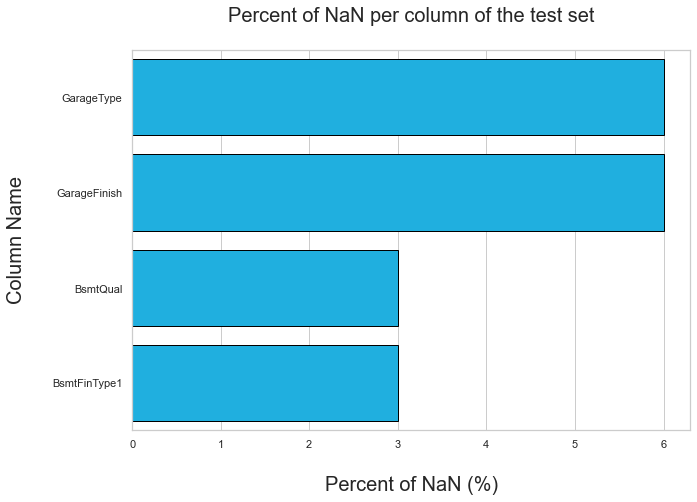

In [625]:
data_test_categ.drop(large_na, axis=1, inplace=True)

# Get names of categorical columns with missing values (test set)
cat_cols_with_missing_t = [col for col in data_test_categ.columns
                           if data_test_categ[col].isnull().any()]

print("Categorical Columns with missing (NA) values:")
print(cat_cols_with_missing_t)

# Count how many NA values are in each of those columns
cat_cols_nan_count_t = list(map(lambda col: round(data_test_categ[col].isna().sum()*100/len(data_test_categ)), 
                              cat_cols_with_missing_t))


tab_cat_t = pd.DataFrame(cat_cols_with_missing_t, columns=["Column"])
tab_cat_t["Percent_NaN"] = cat_cols_nan_count_t
tab_cat_t.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab_cat_t,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [626]:
categ_fill_null = {"GarageType": data_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": data_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": data_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": data_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": data_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": data_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": data_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": data_test_categ["SaleType"].mode().iloc[0]}

data_test_categ = data_test_categ.fillna(value=categ_fill_null)

In [627]:
# Drop the SalePrice column from the training dataset
data_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
data_train_dummies = pd.get_dummies(data_train_categ)
data_train_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [628]:
data_test_dummies = pd.get_dummies(data_test_categ)
data_test_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [629]:
dif_1 = [x for x in data_train_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in data_test_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


In [630]:
# Join numerical and categorical datasets together
# Training set
data_train_new = pd.concat([data_train_imputed, data_train_dummies], axis = 1)
print(f"Train set: {data_train_new.shape}")

# Test set
data_test_new = pd.concat([data_test_imputed, data_test_dummies], axis = 1)
print(f"Test set: {data_test_new.shape}")


Train set: (1460, 173)
Test set: (1460, 173)


In [631]:
# Convert Year of construction to the Age of the house since the construction
data_train_new["AgeSinceConst"] = (data_train_new["YearBuilt"].max() - data_train_new["YearBuilt"])

data_test_new["AgeSinceConst"] = (data_test_new["YearBuilt"].max() - data_test_new["YearBuilt"])

# Drop "YearBuilt"
data_train_new.drop(["YearBuilt"], axis=1, inplace=True)
data_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [632]:
data_train_new["AgeSinceRemod"] = (data_train_new["YearRemodAdd"].max() - data_train_new["YearRemodAdd"])

data_test_new["AgeSinceRemod"] = (data_test_new["YearRemodAdd"].max() - data_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
data_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
data_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [633]:
continuous_features = ['AgeSinceConst', 'AgeSinceRemod', 'MasVnrArea', 'BsmtFinSF1',
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF']

In [645]:
df1['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [647]:
data_skew_verify = data_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(data_skew_verify[i].skew()))

data_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})

sk_features = data_skewed[data_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['AgeSinceConst', 'AgeSinceRemod', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']


In [649]:
data_train_new

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeSinceConst,AgeSinceRemod
0,1.00,60.00,"8,450.00",7.00,5.00,196.00,706.00,0.00,150.00,856.00,...,0,1,0,0,0,0,1,0,7.00,7.00
1,2.00,20.00,"9,600.00",6.00,8.00,0.00,978.00,0.00,284.00,"1,262.00",...,0,1,0,0,0,0,1,0,34.00,34.00
2,3.00,60.00,"11,250.00",7.00,5.00,162.00,486.00,0.00,434.00,920.00,...,0,1,0,0,0,0,1,0,9.00,8.00
3,4.00,70.00,"9,550.00",7.00,5.00,0.00,216.00,0.00,540.00,756.00,...,0,1,1,0,0,0,0,0,95.00,40.00
4,5.00,60.00,"14,260.00",8.00,5.00,350.00,655.00,0.00,490.00,"1,145.00",...,0,1,0,0,0,0,1,0,10.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,"1,456.00",60.00,"7,917.00",6.00,5.00,0.00,0.00,0.00,953.00,953.00,...,0,1,0,0,0,0,1,0,11.00,10.00
1456,"1,457.00",20.00,"13,175.00",6.00,6.00,119.00,790.00,163.00,589.00,"1,542.00",...,0,1,0,0,0,0,1,0,32.00,22.00
1457,"1,458.00",70.00,"9,042.00",7.00,9.00,0.00,275.00,0.00,877.00,"1,152.00",...,0,1,0,0,0,0,1,0,69.00,4.00
1458,"1,459.00",20.00,"9,717.00",5.00,6.00,0.00,49.00,"1,029.00",0.00,"1,078.00",...,0,1,0,0,0,0,1,0,60.00,14.00


In [650]:
# Log transformation of the skewed features
for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
    data_train_new[i] = np.log((data_train_new[i])+1)
    
    # Test set
    data_test_new[i] = np.log((data_test_new[i])+1)

In [656]:
# Log transformation of the target variable "SalePrice"
data_train_new["SalePriceLog"] = np.log(data_train_new.SalePrice)

# Drop the original SalePrice
data_train_new.drop(["SalePrice"], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

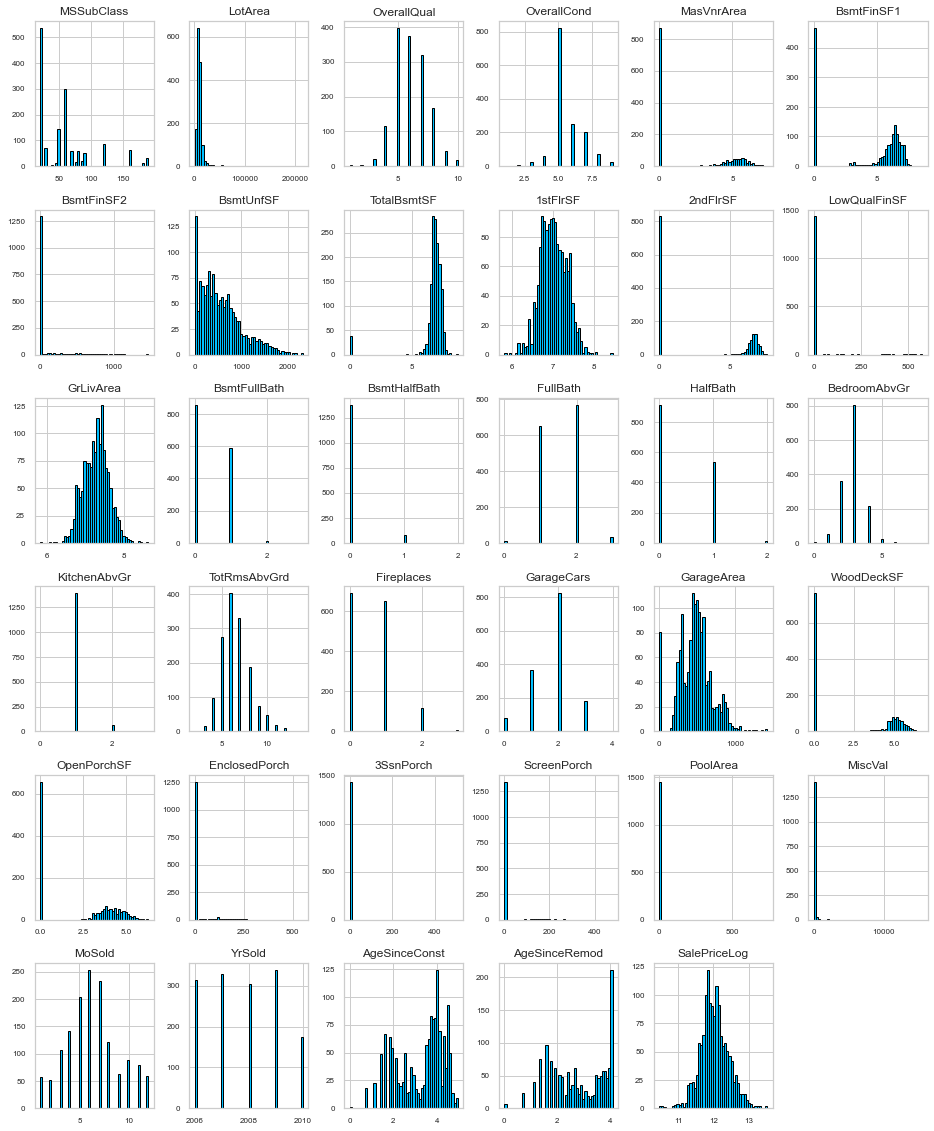

In [664]:
numerical_cols_new = [cname for cname in data_train_new.columns if 
                      data_train_new[cname].dtype in ['int64', 'float64']]

data_train_new_num = data_train_new[numerical_cols_new].copy()
data_train_new_num.drop(["Id"], axis=1, inplace=True)
# Plot the distribution of all the numerical features
fig_ = data_train_new_num.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

In [658]:
# TRAINING DATASET
# Feature variables
X = data_train_new.copy().drop(["SalePriceLog"], axis = 1)

# Target Variable
y = data_train_new.loc[:, "SalePriceLog"]


In [661]:
# Split the data into Training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1168, 172)
y_train:(1168,)

X_test:(292, 172)
y_test:(292,)
